In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../gefera')
import gefera as gf

In [4]:
t = np.linspace(67.8, 68.8, 10000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.9
em = 0.1
pm = 5
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 89.0 * np.pi / 180
mm = 0.5

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys_complex = gf.System(po, mo)
%time lc = sys_complex.lightcurve(t, u1, u2, rp, rm, grad=False)

CPU times: user 7.92 ms, sys: 1.87 ms, total: 9.78 ms
Wall time: 10.6 ms


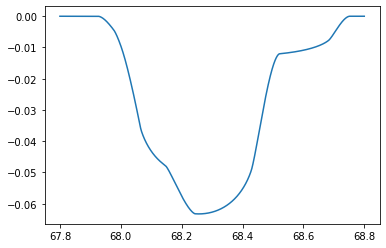

In [5]:
plt.plot(t, lc)

In [6]:
t = np.linspace(67.7, 68.7, 1000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.1
em = 0.1
pm = 5
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 89.0 * np.pi / 180
mm = 0.5

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys_simple = gf.System(po, mo)
%time lc = sys_simple.lightcurve(t, u1, u2, rp, rm)

CPU times: user 837 µs, sys: 452 µs, total: 1.29 ms
Wall time: 871 µs


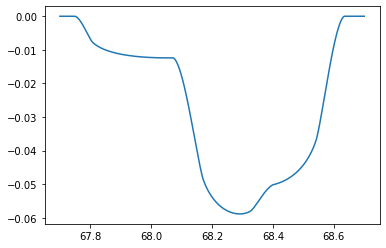

In [7]:
plt.plot(t, lc)

In [8]:
n = np.logspace(1, 6, 6, dtype=int)
times_complex_phot_only = np.zeros(len(n))
times_complex_dynamics = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_complex_phot_only[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=False, phot_only=True)
    times_complex_dynamics[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=False)
    
times_simple_phot_only = np.zeros(len(n))
times_simple_dynamics = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_simple_phot_only[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=False, phot_only=True)
    times_simple_dynamics[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=False)

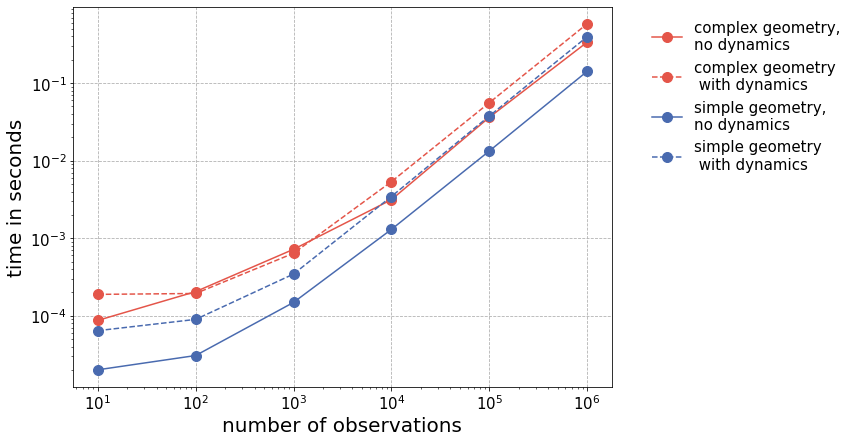

In [9]:
from matplotlib import cm
plt.figure(figsize=(13, 7))

plt.loglog(n, times_complex_phot_only, 'o', markersize=10, linestyle='-', color=cm.Spectral(0.15), label='complex geometry, \nno dynamics')
plt.loglog(n, times_complex_dynamics, 'o', markersize=10, linestyle='--', color=cm.Spectral(0.15), label='complex geometry \n with dynamics')
plt.loglog(n, times_simple_phot_only, 'o', markersize=10, linestyle='-', color=cm.Spectral(0.95), label='simple geometry, \nno dynamics')
plt.loglog(n, times_simple_dynamics, 'o', markersize=10, linestyle='--', color=cm.Spectral(0.95), label='simple geometry \n with dynamics')
plt.grid(linestyle='--')
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1.0), frameon=False)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('number of observations', fontsize=20)
plt.ylabel('time in seconds', fontsize=20)
plt.subplots_adjust(right=0.7)
plt.savefig('/Users/tgordon/Desktop/benchmarks_nograd.pdf')

In [10]:
n = np.logspace(1, 6, 6, dtype=int)
times_complex_phot_only = np.zeros(len(n))
times_complex_dynamics = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_complex_phot_only[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=True, phot_only=True)
    times_complex_dynamics[i] = sys_complex.time(t, u1, u2, rp, rm, ntimes=20, grad=True)
    
times_simple_phot_only = np.zeros(len(n))
times_simple_dynamics = np.zeros(len(n))

for i in range(len(n)):
    t = np.linspace(67.8, 68.8, n[i])
    times_simple_phot_only[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=True, phot_only=True)
    times_simple_dynamics[i] = sys_simple.time(t, u1, u2, rp, rm, ntimes=20, grad=True)

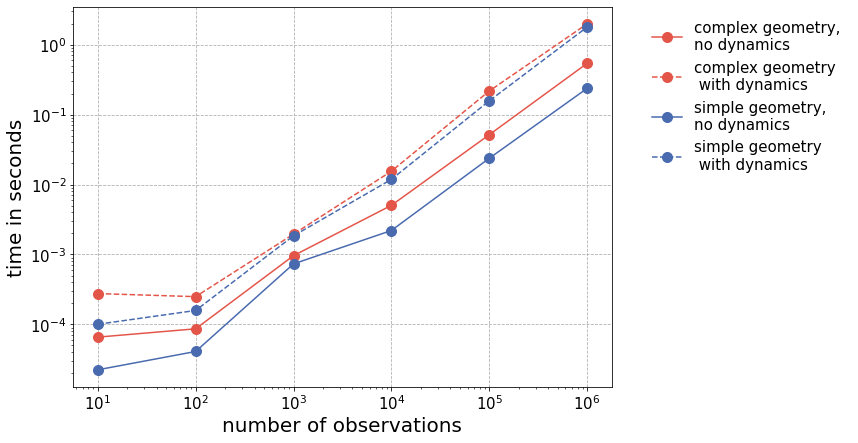

In [11]:
from matplotlib import cm
plt.figure(figsize=(13, 7))

plt.loglog(n, times_complex_phot_only, 'o', markersize=10, linestyle='-', color=cm.Spectral(0.15), label='complex geometry, \nno dynamics')
plt.loglog(n, times_complex_dynamics, 'o', markersize=10, linestyle='--', color=cm.Spectral(0.15), label='complex geometry \n with dynamics')
plt.loglog(n, times_simple_phot_only, 'o', markersize=10, linestyle='-', color=cm.Spectral(0.95), label='simple geometry, \nno dynamics')
plt.loglog(n, times_simple_dynamics, 'o', markersize=10, linestyle='--', color=cm.Spectral(0.95), label='simple geometry \n with dynamics')
plt.grid(linestyle='--')
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1.0), frameon=False)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('number of observations', fontsize=20)
plt.ylabel('time in seconds', fontsize=20)
plt.subplots_adjust(right=0.7)
plt.savefig('/Users/tgordon/Desktop/benchmarks_grad.pdf')